# Plotting WaveWatch III Global Wave Model Data

_Note: this notebook requires python3._

This notebook demonstrates a possible use case for the [WaveWatch III Global Ocean Wave Model](http://data.planetos.com/datasets/noaa_ww3_global_1.25x1d:noaa-wave-watch-iii-nww3-ocean-wave-model?utm_source=github&utm_medium=notebook&utm_campaign=ww3-api-notebook) using the Planet OS API.

API documentation is available at http://docs.planetos.com. If you have questions or comments, join the [Planet OS Slack community](http://slack.planetos.com) to chat with our development team.

For general information on usage of IPython/Jupyter and Matplotlib, please refer to their corresponding documentation. https://ipython.org/ and http://matplotlib.org/

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import dateutil.parser
import datetime
from urllib.request import urlopen, Request
import simplejson as json

In [2]:
#location = 'Hawaii Oahu'
location = 'Somewhere'
#location = 'Au'
if location == 'Est':
    longitude = 24.+45./60
    latitude = 59+25/60.
elif location == 'Au':
    longitude = 149. + 7./60
    latitude = -35.-18./60
elif location == "Hawaii Oahu":
    latitude = 21.205
    longitude = -158.35
elif location == 'Somewhere':
    longitude = -20.
    latitude = 10.

**Important!** You'll need to replace `apikey` below with your actual Planet OS API key, which you'll find on the [Planet OS account settings page](http://data.planetos.com/account/settings/?utm_source=github&utm_medium=notebook&utm_campaign=ww3-api-notebook).

In [3]:
apikey = 'YOUR-API-KEY-GOES-HERE'
API_url = "http://api.planetos.com/v1/datasets/noaa_ww3_global_1.25x1d/point?lon={0}&lat={1}&count=1000&verbose=false&apikey={2}".format(longitude,latitude,apikey)
request = Request(API_url)
response = urlopen(request)
API_data = json.loads(response.read())

In [4]:
varlist = []
print("{0:<50} {1}".format("Variable","Context"))
print()
for k,v in set([(j,i['context']) for i in API_data['entries'] for j in i['data'].keys()]):
    print("{0:<50} {1}".format(k,v))
    varlist.append(k)

Variable                                           Context

Mean_period_of_wind_waves_surface                  reftime_time_lat_lon
Wind_direction_from_which_blowing_surface          reftime_time_lat_lon
Mean_period_of_swell_waves_ordered_sequence_of_data reftime_time_lat_lon_ordered_sequence_of_data
Primary_wave_direction_surface                     reftime_time_lat_lon
Secondary_wave_mean_period_surface                 reftime_time_lat_lon
Primary_wave_mean_period_surface                   reftime_time_lat_lon
Wind_speed_surface                                 reftime_time_lat_lon
Significant_height_of_swell_waves_ordered_sequence_of_data reftime_time_lat_lon_ordered_sequence_of_data
v-component_of_wind_surface                        reftime_time_lat_lon
u-component_of_wind_surface                        reftime_time_lat_lon
Direction_of_swell_waves_ordered_sequence_of_data  reftime_time_lat_lon_ordered_sequence_of_data
Significant_height_of_combined_wind_waves_and_swell_surface reft

In [5]:
reftimes = set()
for i in API_data['entries']:
    reftimes.update([i['axes']['reftime']])
reftimes=list(reftimes)
if len(reftimes)>1:
    reftime = reftimes[0] if dateutil.parser.parse(reftimes[0])<dateutil.parser.parse(reftimes[1]) else reftimes[1]
else:
    reftime = reftimes[0]

In [6]:
reftime

'2016-04-26T00:00:00'

In [7]:
vardict = {}
for i in varlist:
    vardict['time_'+i]=[]
    vardict['data_'+i]=[]
for i in API_data['entries']:
    #print(i['context'])
    for j in i['data']:
        vardict['data_'+j].append(i['data'][j])
        vardict['time_'+j].append(dateutil.parser.parse(i['axes']['time']))

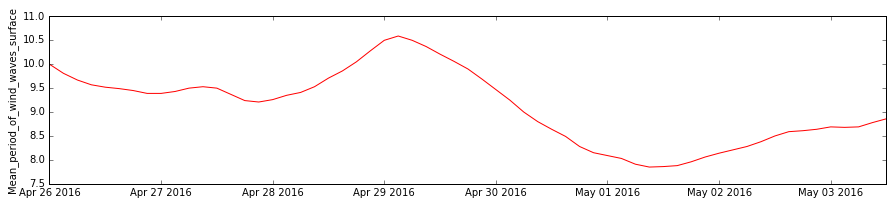

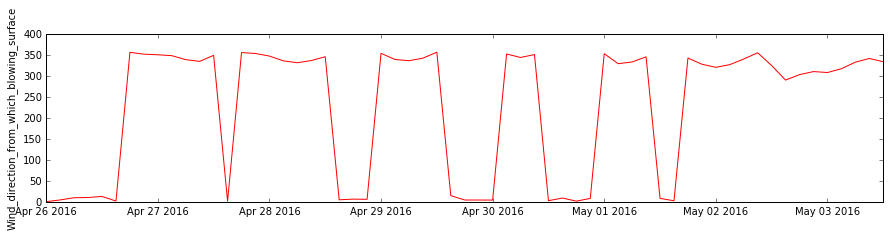

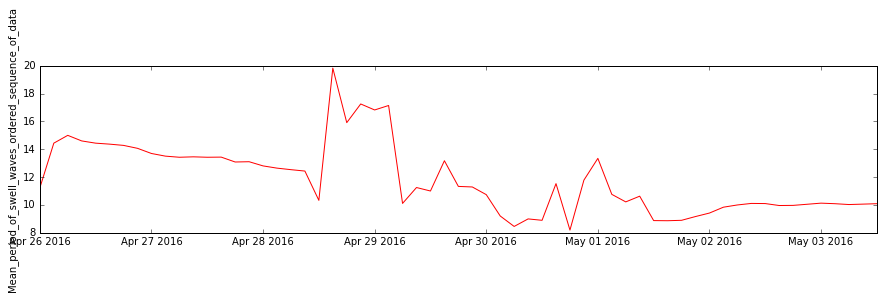

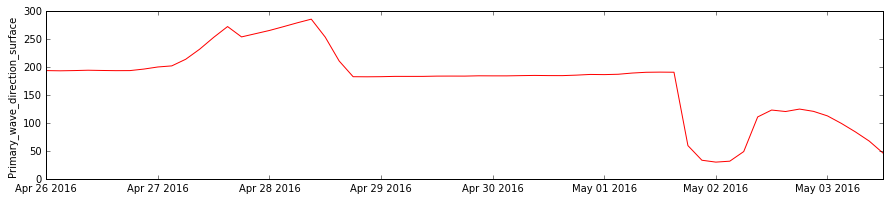

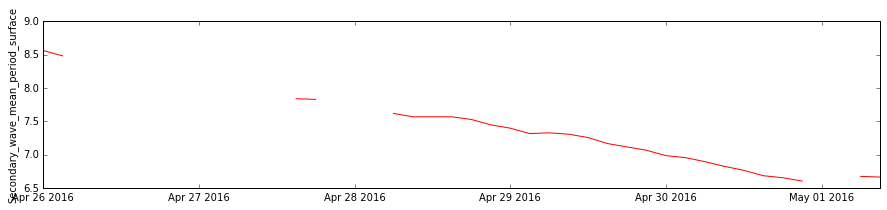

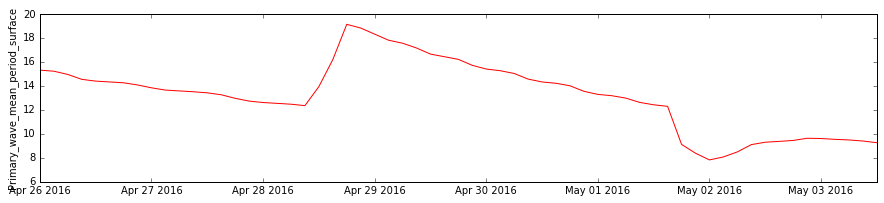

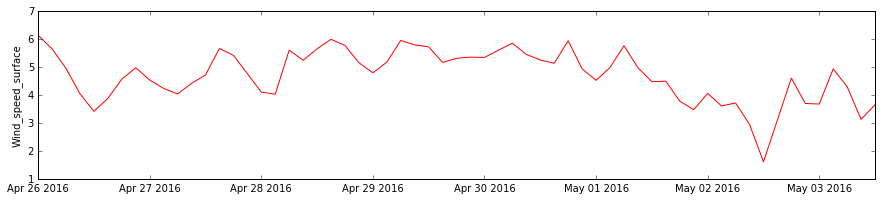

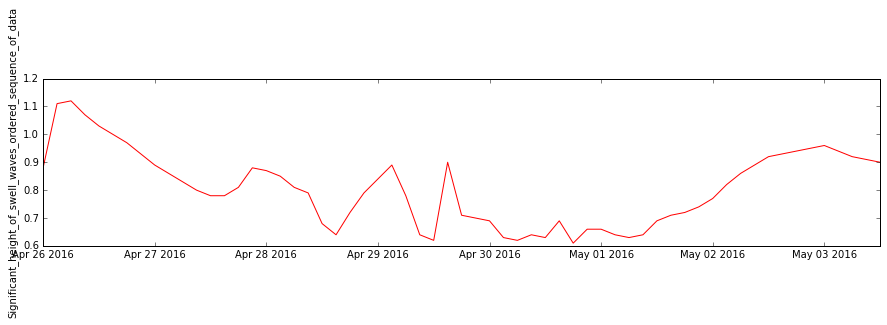

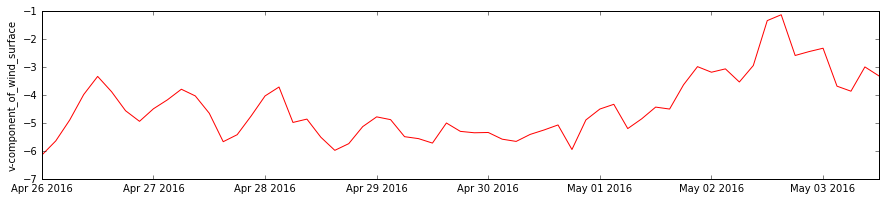

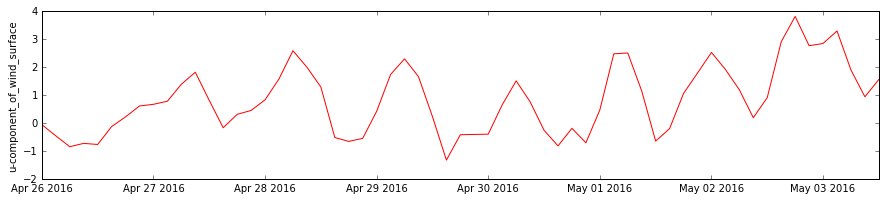

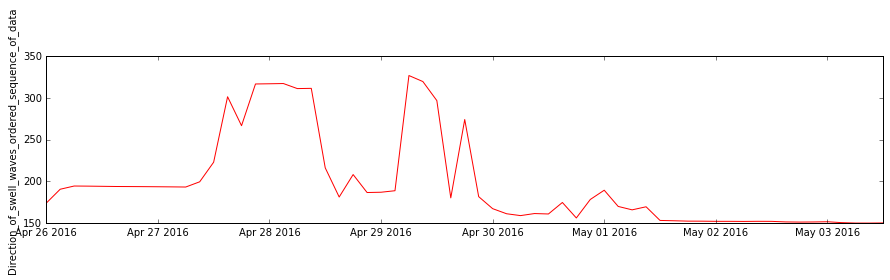

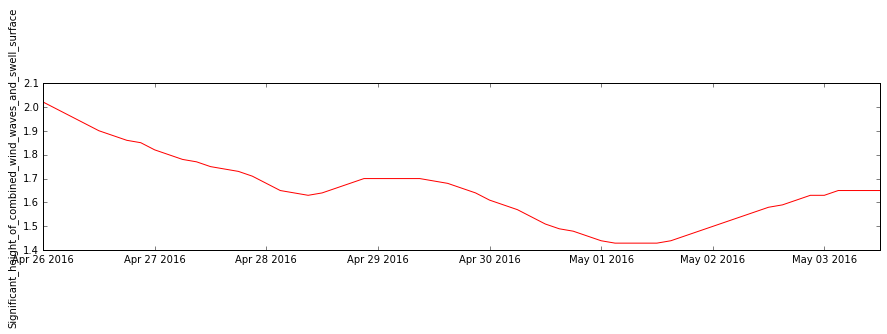

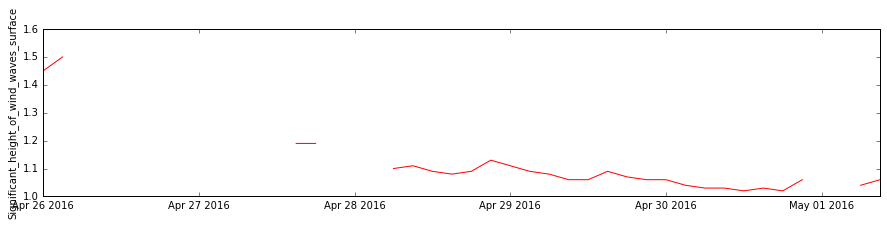

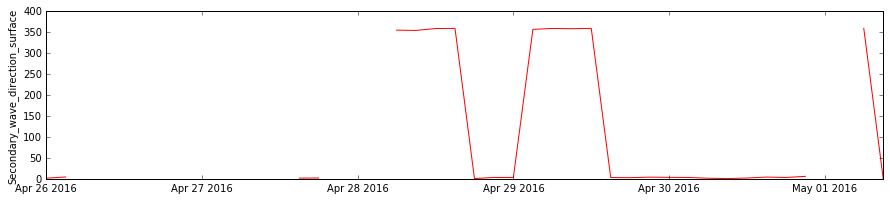

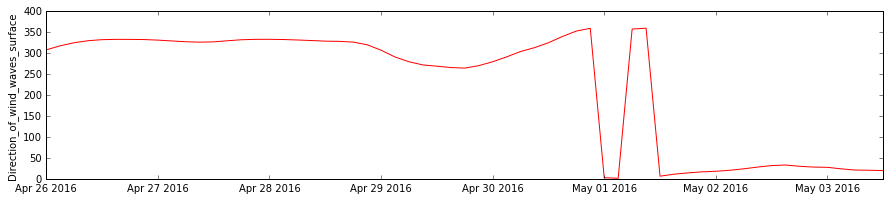

In [8]:
for i in varlist:
    fig = plt.figure(figsize=(15,3))
    ax = fig.add_subplot(111)
    plt.plot(vardict['time_'+i],vardict['data_'+i],color='r')
    ax.set_ylabel(i)